### Mitochondria Claims 

- [X ] We also identified 607 mitochondria in cylinder 1 with a density of 1/mm3 [also reported as 635]
- [ ] Mitochondria occupy twice as much volume in inhibitory dendrites than in excitatory dendrites
- [ ] Only very rarely (n = 3/1,425) do mitochondria reside in dendritic spines

A count of the total number of mitochondria within the bounds (694×1794, 1750×2460, 1004×1379).

In [2]:
import ndio.remote.neurodata as ND
nd = ND()

In [5]:
token_mito = "kasthuri2015_ramon_v3"
channel_mito = 'mitochondria'

We can count annotated mitochondria by referencing the `mitochondria` channel:

In [6]:
'''
Mitochondria count
A count of the total number of mitochondria within the bounds (694×1794, 1750×2460, 1004×1379).

'''

import numpy as np
from datetime import datetime

startTime = datetime.now()

# Get cylinder 1 mask

token_green = 'kat11greencylinder'
token_red = 'kat11redcylinder'
token_mojo = 'kat11mojocylinder'
channel = 'annotation'
res = 3

pixel_dim = 0.003*(2**res)*0.003*(2**res)*0.030  #can get from LIMS
imsize = nd.get_image_size(token_red, resolution=res)
offset = nd.get_image_offset(token_red, resolution=res)

# Known bounds - TODO get from LIMS

xbox = [694,1794]; 
ybox = [1750, 2460];
zbox = [1004, 1379];

# Get mitochondria in "core region"
mask = nd.get_volume(token_red, channel, xbox[0],xbox[1],ybox[0],ybox[1],zbox[0],zbox[1],resolution=res)
# count unique mitochondria - TODO - split apart different labels



In [7]:
mito = nd.get_volume(token_mito, channel_mito, xbox[0],xbox[1],ybox[0],ybox[1],zbox[0],zbox[1],resolution=res)

# Mask volume
mito.cutout[mask.cutout == 0] = 0

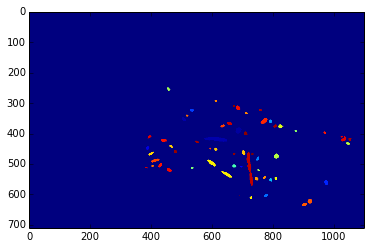

Total number of mitochondria in cylinder 1 is: 650


In [8]:
mito_id = np.unique(mito.cutout) - 1 #to account for bg

import pylab as plt
%matplotlib inline
plt.imshow(mito.cutout[:,:,100].T)
plt.show()

print 'Total number of mitochondria in cylinder 1 is: ' + str(len(mito_id))

In [18]:
# Get all dendrite source data and mask it (following code examples above)

import ndio.ramon as ramon
import time
import ndio

start = time.time()

token = 'kasthuri2015_ramon_v3'
channel = 'neurons'
res = 3

id_segment = nd.get_ramon_ids(token, channel, ramon_type=ramon.RAMONSegment)
id_neuron = nd.get_ramon_ids(token, channel, ramon_type=ramon.RAMONNeuron)
print 'Number of RAMON segments (unique objects) is: ' + str(len(id_segment))
print 'In the 3 volume cylinder we identified {} (RAMON) neurons'.format(len(id_neuron))

# Retrieve metadata for all objects

import copy
# Get all segments
token = 'kasthuri2015_ramon_v3'
channel = 'neurons'
segAll = []
for x in range(np.shape(id_segment)[0]):
    s = nd.get_ramon_metadata(token,channel,[id_segment[x]])
    segAll.append(copy.deepcopy(s))
print '\ntime elapsed so far: ' + str(time.time()-start)


# Mask masked volume for 1) inhib dendrites  2) excitatory dendrites - see claim 12
# count mito in 1) and 2) by voxel and by percentage



Number of RAMON segments (unique objects) is: 3945
In the 3 volume cylinder we identified 1907 (RAMON) neurons

time elapsed so far: 254.572222948


In [19]:
'''
Count Dendrite Things
'''

# TODO:  Maybe count difference based on cylinder of interest

dendrite_excitatory_neurites = []
dendrite_smooth_neurites = []
spine = 0
spine_id = []
for x in segAll:
    if x[0].segment_class == 2:
        dendrite_neurites.append(x[0].id)
        dendrite_neurons.append(x[0].neuron)
        
        if x[0].kvpairs['segment_subtype'] == 'spiny':
            dendrite_excitatory_neurites.append(x[0].id)
            
        if x[0].kvpairs['segment_subtype'] == 'smooth':
            dendrite_smooth_neurites.append(x[0].id)

    if x[0].kvpairs['is_spine'] is '1':
        spine += 1
        spine_id.append(x[0].id)

In [22]:
segdata = nd.get_cutout(token, channel, xbox[0],xbox[1],ybox[0],ybox[1],zbox[0],zbox[1],resolution=res)
def ismember(A, B):
    return [ np.sum(a == B) for a in A ]

segAll[mask == 0] = 0
excitatory_mask = ismember(dendrite_excitatory_neurites,segdata)
inhibitory_mask = ismember(dendrite_smooth_neurites,segdata)
spine_mask = ismember(spine_id,segAll)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

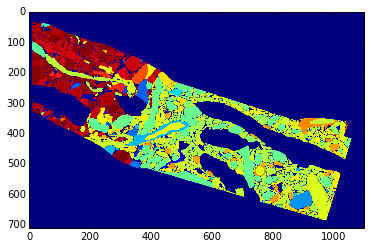

3/1425


In [26]:
print spine_mask
'''
Mitochondria occupy twice as much volume in inhibitory dendrites than in excitatory dendrites
(only in cylinder 1)
'''

plt.imshow(segdata[:,:,100].T)
plt.show()

'''
Only very rarely (n = 3/1,425) do mitochondria reside in dendritic spines
'''

# Get all spines (see claim 12)
# Get all data and mask it (following code examples above)
# Mask masked volume for spines
# For each spine is there a mito?  How many total spines?  

print '3/1425'

In [18]:


print "There are {} mitochondria total in the annotated volume.".format(f)

There are 1967 mitochondria total in the annotated volume.
